In [1]:
# 整理数据的库
import numpy as np
import pandas as pd
import pyreadstat #读取sav格式文件需要
# 数据可视化的库
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
# 数据分析的库
from scipy import stats
import scipy.stats as stats
import statsmodels.formula.api as smf # 回归分析
from scipy.stats import chi2_contingency #卡方检验
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd #事后检验
# 其它
import warnings
warnings.filterwarnings('ignore') #忽视警告

# 读取数据及初步处理

In [2]:
df_1,meta_1 = pyreadstat.read_sav("esl.sav",encoding='utf-8') #dataframe的值为纯数字

In [3]:
df_2,meta_2 = pyreadstat.read_sav("esl.sav",encoding='utf-8',apply_value_formats=True)# dataframe的值为元信息
#注意：李克特计分方法的变量pyreadstat认定为类别型变量，这个和我们的需求是不同的

In [4]:
# 我们要做的是取df_1中的数值型变量出来，取df_2的类别型变量出来，合并成新的df
df_a = df_2.loc[:,"Q1":"Q4"] #取出Q1~Q4变量（类别型变量）
df_b = df_1.loc[:,"Q5":"Q11_行3"]#取出Q5~Q11_行3变量（数值型变量）
df_c =df_2.loc[:,"Q12":"Q17"]#取出Q12~Q17变量（类别型变量）

df = pd.concat([df_a,df_b,df_c],axis=1)#按列（变量）合并三个df

In [5]:
# 查看一下数据
df.head(3)

,Q1,Q2_选项1,Q2_选项2,Q2_选项3,Q2_选项4,Q3,Q4,Q5,Q6,Q7_行1,...,Q10_行4,Q11_行1,Q11_行2,Q11_行3,Q12,Q13,Q14,Q15,Q16,Q17
0,否,NaN,NaN,NaN,NaN,通过了,未通过,2.0,4.0,NaN,...,NaN,NaN,NaN,NaN,女,非城镇类,大三,人文社科类,文学与传媒学院,NaN
1,是,选中,选中,选中,未选中,未通过,NaN,4.0,4.0,2.0,...,4.0,4.0,5.0,4.0,男,城镇类,大三,人文社科类,文学与传媒学院,NaN
2,否,NaN,NaN,NaN,NaN,通过了,未通过,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,女,城镇类,大三,人文社科类,文学与传媒学院,NaN


## 处理一下变量名

In [6]:
df.columns #原变量名

Index(['Q1', 'Q2_选项1', 'Q2_选项2', 'Q2_选项3', 'Q2_选项4', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7_行1', 'Q7_行2', 'Q7_行3', 'Q7_行4', 'Q7_行5', 'Q7_行6', 'Q7_行7', 'Q8_行1',
       'Q8_行2', 'Q8_行3', 'Q8_行4', 'Q8_行5', 'Q8_行6', 'Q9_行1', 'Q9_行2', 'Q9_行3',
       'Q9_行4', 'Q9_行5', 'Q9_行6', 'Q10_行1', 'Q10_行2', 'Q10_行3', 'Q10_行4',
       'Q11_行1', 'Q11_行2', 'Q11_行3', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17'],
      dtype='object')

In [7]:
# 重命名变量名
df.columns = ['usage', 'platform_bilibili', 'platform_icourse', 'platform_tencent',
       'platform_other', 'cet4', 'cet6', 'gaokao', 'digital_skill',
       'study_grammar', 'study_vocabulary', 'study_listening',
       'study_speaking', 'study_writing', 'study_translation', 'study_reading',
       'behav_1', 'behav_2', 'behav_3', 'behav_4', 'behav_5', 'behav_6',
       'cogn_1', 'cogn_2', 'cogn_3', 'cogn_4', 'cogn_5', 'cogn_6', 'emo_1',
       'emo_2', 'emo_3', 'emo_4', 'soc_1', 'soc_2', 'soc_3', 'gender', 'hukou',
       'grade', 'major_type', 'school', 'major']

In [8]:
df.columns #查看一下现变量名

Index(['usage', 'platform_bilibili', 'platform_icourse', 'platform_tencent',
       'platform_other', 'cet4', 'cet6', 'gaokao', 'digital_skill',
       'study_grammar', 'study_vocabulary', 'study_listening',
       'study_speaking', 'study_writing', 'study_translation', 'study_reading',
       'behav_1', 'behav_2', 'behav_3', 'behav_4', 'behav_5', 'behav_6',
       'cogn_1', 'cogn_2', 'cogn_3', 'cogn_4', 'cogn_5', 'cogn_6', 'emo_1',
       'emo_2', 'emo_3', 'emo_4', 'soc_1', 'soc_2', 'soc_3', 'gender', 'hukou',
       'grade', 'major_type', 'school', 'major'],
      dtype='object')

# 注意:以下代码跟esl_excel.ipynb一致

## 反向编码

In [9]:
# 第10题的第四小题是反向题，我们需要将数据的编码顺序进行反转。
# 先看一下数据的形态
df.emo_4.head(10)

0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
5    6.0
6    NaN
7    NaN
8    5.0
9    3.0
Name: emo_4, dtype: float64

In [10]:
#通过列表的方式将编码形式进行转换
before = [1,2,3,4,5,6]
after = [6,5,4,3,2,1]

df["emo_4_recode"] = df["emo_4"].replace(before,after)

In [11]:
#查看反向编码之后的结果
df.emo_4_recode.head(10)

0    NaN
1    3.0
2    NaN
3    NaN
4    NaN
5    1.0
6    NaN
7    NaN
8    2.0
9    4.0
Name: emo_4_recode, dtype: float64

# 数据计算

In [12]:
#计算behav,cogn,emo,soc这四个变量

In [13]:
df["behav"] = (
    df.behav_1
    + df.behav_2
    + df.behav_3
    + df.behav_4
    + df.behav_5
    + df.behav_6
) / 6
df["cogn"] = (
    df.cogn_1
    + df.cogn_2
    + df.cogn_3
    + df.cogn_4
    + df.cogn_5
    + df.cogn_6
) / 6
df["emo"] = (
    df.emo_1 + df.emo_2 + df.emo_3 + df.emo_4_recode   #注意这里用反转后的题目
) / 4
df["soc"] = (df.soc_1 + df.soc_2 + df.soc_3) / 3



In [14]:
#检查一下数据
df.head(5)

,usage,platform_bilibili,platform_icourse,platform_tencent,platform_other,cet4,cet6,gaokao,digital_skill,study_grammar,...,hukou,grade,major_type,school,major,emo_4_recode,behav,cogn,emo,soc
0,否,NaN,NaN,NaN,NaN,通过了,未通过,2.0,4.0,NaN,...,非城镇类,大三,人文社科类,文学与传媒学院,NaN,NaN,NaN,NaN,NaN,NaN
1,是,选中,选中,选中,未选中,未通过,NaN,4.0,4.0,2.0,...,城镇类,大三,人文社科类,文学与传媒学院,NaN,3.0,3.333333,4.0,4.5,4.333333
2,否,NaN,NaN,NaN,NaN,通过了,未通过,3.0,5.0,NaN,...,城镇类,大三,人文社科类,文学与传媒学院,NaN,NaN,NaN,NaN,NaN,NaN
3,否,NaN,NaN,NaN,NaN,未通过,NaN,2.0,5.0,NaN,...,城镇类,大三,人文社科类,文学与传媒学院,NaN,NaN,NaN,NaN,NaN,NaN
4,否,NaN,NaN,NaN,NaN,未通过,NaN,2.0,5.0,NaN,...,非城镇类,大三,人文社科类,文学与传媒学院,NaN,NaN,NaN,NaN,NaN,NaN


#筛选一个数据集出来供部分统计分析使用

In [15]:
df_yes = df[df.usage == "是"] # 使用在线英语学习平台的子样本

# 数据分析

## ✨探索数据（描述性统计）

In [16]:
# 返回所有变量的描述性统计结果（注意——这里的描述性统计结果仅适用于“数值型变量”）
df.describe()

,gaokao,digital_skill,study_grammar,study_vocabulary,study_listening,study_speaking,study_writing,study_translation,study_reading,behav_1,...,emo_3,emo_4,soc_1,soc_2,soc_3,emo_4_recode,behav,cogn,emo,soc
count,57.000000,57.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2.701754,3.894737,1.896552,2.862069,2.344828,1.931034,2.034483,2.206897,2.482759,3.413793,...,3.758621,4.034483,3.517241,3.241379,3.482759,2.965517,3.298851,3.793103,3.629310,3.413793
std,1.034493,0.938924,0.816999,0.953345,0.813979,0.842235,0.778403,0.861034,0.911070,1.401969,...,1.122980,1.017095,1.326130,1.405478,1.271127,1.017095,1.054449,1.074280,0.778106,1.268217
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.250000,1.000000
25%,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,3.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.500000,3.333333,3.250000,2.333333
50%,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.500000,4.000000,3.750000,3.333333
75%,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.333333,4.000000,4.333333
max,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,4.750000,6.000000


In [17]:
# 返回单个变量的描述性统计结果
df["behav"].describe()


count    29.000000
mean      3.298851
std       1.054449
min       1.000000
25%       2.500000
50%       3.500000
75%       4.000000
max       5.000000
Name: behav, dtype: float64

<AxesSubplot: xlabel='behav', ylabel='Count'>

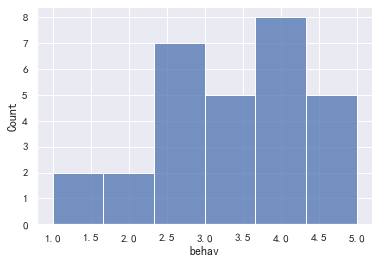

In [18]:
# 直方图
sns.histplot(data=df, x = "behav")

In [19]:
# 类别型变量的描述性统计结果
df.gender.value_counts()

女    47
男    10
Name: gender, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

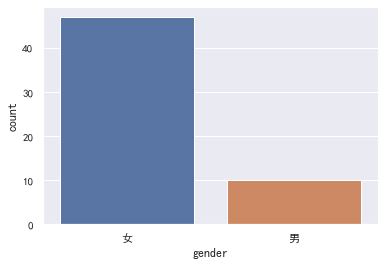

In [20]:
# 条形图
sns.countplot(x="gender", data=df)

In [21]:
# 饼状图
table_school = df.school.value_counts()#将学院变量整理成表格
table_school


文学与传媒学院       31
商学院           10
会计学院           5
公共管理学院         4
电子与计算机工程学院     4
云康医学与健康学院      1
艺术设计与创意产业系     1
音乐系            1
Name: school, dtype: int64

<AxesSubplot: ylabel='school'>

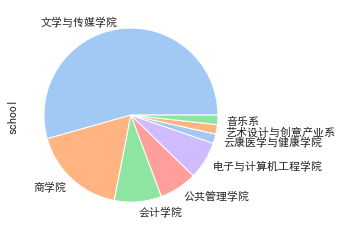

In [22]:
colors = sns.color_palette('pastel')[0:5] #使用seaborn的调色板

table_school.plot.pie(colors = colors)#用matplotlib画图

## 🎉推断性统计

### 1、独立样本t检验

性别（gender） & 行为投入(behav)

In [23]:
# 男女生行为投入的平均值
df.groupby("gender").behav.mean()



gender
女    3.405797
男    2.888889
Name: behav, dtype: float64

In [24]:
# 独立样本t检验结果（检验统计量t值，p值）
stats.ttest_ind(
    df_yes["behav"][df_yes["gender"] == "男"],
    df_yes["behav"][df_yes["gender"] == "女"],
)



Ttest_indResult(statistic=-1.0722246921722047, pvalue=0.2931097853713329)

<AxesSubplot: xlabel='gender', ylabel='behav'>

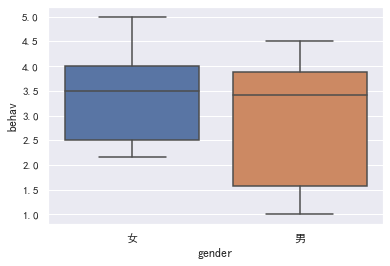

In [25]:
## 独立样本t检验结果可视化
sns.boxplot(x = df["gender"], y = df["behav"]) 

**结果解读：**
男生和女生行为投入分别是3.41和2.89.独立样本t检验显示男生和女生行为投入**没有显著差异**(t=-1.07,p=0.29 > 0.05)。

### 2、单因素方差分析

学院（school） & 行为投入（behav）

In [26]:
df.groupby('school').behav.mean()

school
云康医学与健康学院     4.500000
会计学院          3.500000
公共管理学院        3.333333
商学院           3.700000
文学与传媒学院       3.186275
电子与计算机工程学院    1.000000
艺术设计与创意产业系    4.000000
音乐系                NaN
Name: behav, dtype: float64

In [27]:
# 单因素方差分析
aov = pg.anova(data=df, dv="behav", between="school", detailed=True)
print(aov)


   Source         SS  DF        MS        F     p-unc       np2
0  school   8.283164   6  1.380527  1.32923  0.286206  0.266064
1  Within  22.849020  22  1.038592      NaN       NaN       NaN


In [28]:
#事后检验
posthoc = pairwise_tukeyhsd(df_yes['behav'], df_yes['school'])
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
 云康医学与健康学院       会计学院     -1.0 0.9916 -5.6643 3.6643  False
 云康医学与健康学院     公共管理学院  -1.1667 0.9506 -4.9751 2.6417  False
 云康医学与健康学院        商学院     -0.8 0.9901  -4.413  2.813  False
 云康医学与健康学院    文学与传媒学院  -1.3137 0.8655 -4.7075 2.0801  False
 云康医学与健康学院 电子与计算机工程学院     -3.5 0.2337 -8.1643 1.1643  False
 云康医学与健康学院 艺术设计与创意产业系     -0.5 0.9998 -5.1643 4.1643  False
      会计学院     公共管理学院  -0.1667    1.0 -3.9751 3.6417  False
      会计学院        商学院      0.2    1.0  -3.413  3.813  False
      会计学院    文学与传媒学院  -0.3137 0.9999 -3.7075 3.0801  False
      会计学院 电子与计算机工程学院     -2.5 0.6018 -7.1643 2.1643  False
      会计学院 艺术设计与创意产业系      0.5 0.9998 -4.1643 5.1643  False
    公共管理学院        商学院   0.3667 0.9987  -2.042 2.7753  False
    公共管理学院    文学与传媒学院  -0.1471    1.0 -2.2125 1.9183  False
    公共管理学院 电子与计算机工程学院  -2.3333  0.452 -6

<AxesSubplot: xlabel='school', ylabel='behav'>

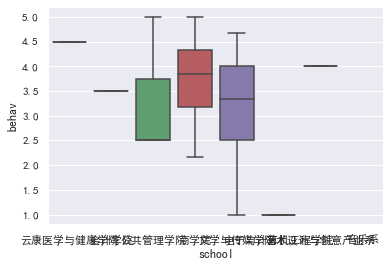

In [29]:
# 单因素方差分析结果可视化
sns.boxplot(x="school", y="behav", data=df)

<AxesSubplot: xlabel='school', ylabel='behav'>

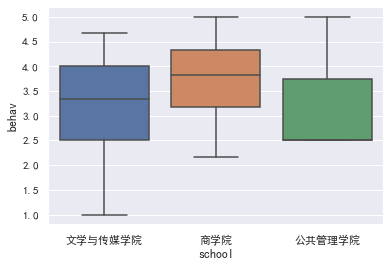

In [30]:
# 筛选"文学与传媒学院","商学院","公共管理学院"这三个学院
sns.boxplot(x = 'school', y = 'behav', data = df, order= ["文学与传媒学院","商学院","公共管理学院"]) 

**结果解读：**
不同学院的学生在行为投入上**没有显著差异**(F = 1.33, p = 0.29 > 0.05)。

### 3、卡方检验

四级成绩(cet4) & 平台使用（usage）

In [31]:
# 列联表
crosstab = pd.crosstab(df.cet4,df.usage)
crosstab


usage,否,是
cet4,,
未通过,13,12
通过了,15,17


In [32]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab) 


In [33]:
#卡方值
stat

0.013710360221674767

In [34]:
# p值
print("p = " + str(p))

p = 0.9067877455744078


<AxesSubplot: xlabel='usage', ylabel='count'>

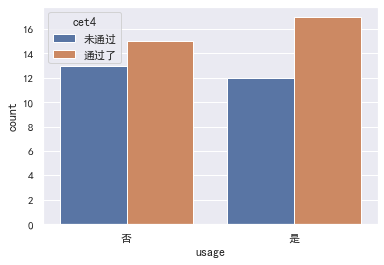

In [35]:
# 卡方检验结果可视化
sns.countplot(x = 'usage', hue = 'cet4', data = df) 

**结果解读：**
卡方检验的结果显示“四级成绩”与“英语学习平台”**没有显著关联**（chisq=0.14,p=0.91 >0.05）。

### 4、相关分析

数字能力（digital_skill） & 行为投入（behav）

In [36]:
# 努力方式与排名的相关关系
pg.pairwise_corr(df, columns=["digital_skill","behav"], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,digital_skill,behav,pearson,two-sided,29,0.153532,"[-0.23, 0.49]",0.426522,0.312,0.125557


<AxesSubplot: xlabel='digital_skill', ylabel='behav'>

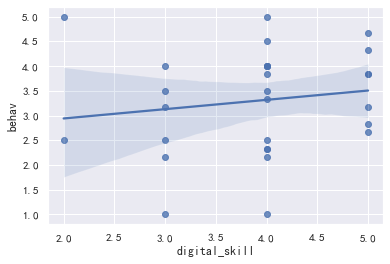

In [37]:
# 散点图（两变量）（包含拟合直线）
sns.regplot(x = "digital_skill", y = "behav", data = df)

**结果解读：**
相关分析的结果显示“数字能力”与“行为投入”**没有显著相关**（r=0.15,p=0.43 > 0.05）。

In [38]:
# 多个变量的相关分析
df[[ "behav","cogn","emo","soc"]].rcorr()

,behav,cogn,emo,soc
behav,-,***,***,***
cogn,0.762,-,***,***
emo,0.74,0.818,-,***
soc,0.765,0.792,0.701,-


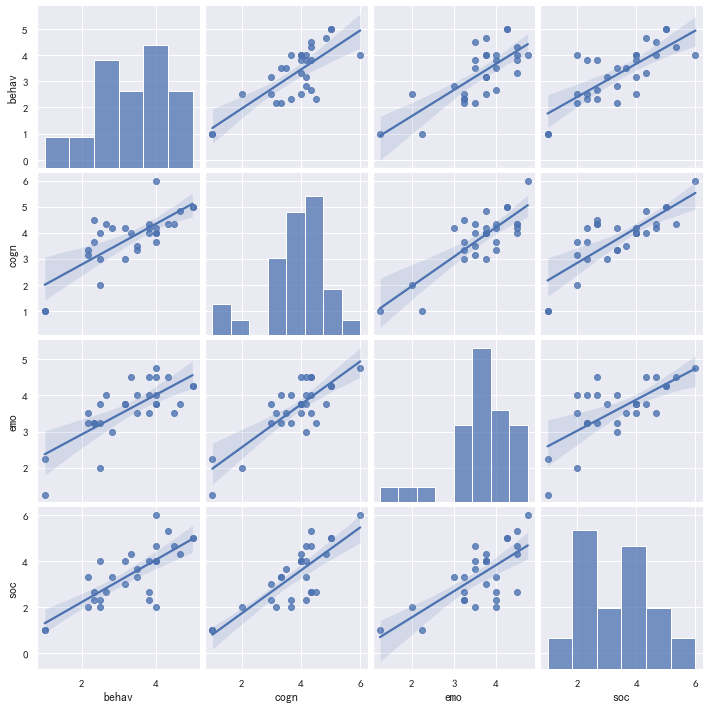

In [39]:
# 筛选多个变量画出散点图（含回归直线）“矩阵”
sns.pairplot(df[["behav","cogn","emo","soc"]], kind="reg")

**结果解读：**
相关分析的结果显示“行为投入”、“认知投入”、“情感投入”和“社会性投入”两两之间显著相关。

### 5、信度分析

In [40]:
df_behav = df.filter(regex = "^behav_.*")#以正则表达式的办法筛选以"behav_"开头的变量
pg.cronbach_alpha(data=df_behav)[0]

0.8372900129222817

In [41]:
df_cogn = df.filter(regex = "^cogn_.*")#以正则表达式的办法筛选以"cogn_"开头的变量
pg.cronbach_alpha(data=df_cogn)[0]

0.9382025136352856

In [42]:
df_emo = df[["emo_1","emo_2","emo_3","emo_4_recode"]]
pg.cronbach_alpha(data=df_emo)[0]

0.6031019577930332

In [43]:
df_soc = df.filter(regex = "^soc_.*")#以正则表达式的办法筛选以"soc_"开头的变量
pg.cronbach_alpha(data=df_soc)[0]

0.9456355283307811

**结果解读：**
“行为投入”、“认知投入”、“情感投入”和“社会性投入”等变量的克隆巴赫系数分别为0.84, 0.94, 0.60, 0.95.“行为投入”、“认知投入”和“社会性投入”的信度水平较高,“情感投入”的信度水平一般般。